In [37]:
using Revise
using MajoranaPropagation
using PauliPropagation

using Plots 
using LaTeXStrings
using ProgressMeter
using TimerOutputs
using Base.Threads

@show nthreads()

nthreads() = 4


4

In [38]:
nspinful = 20
topo = bricklayertopology(nspinful)

U = 1.
t = 0.5
dt = 0.1 

circ_single = []
thetas_single = []

#up hoppings 
for (i, j) in topo
    push!(circ_single, FermionicGate(:hopup, [i, j]))
    push!(thetas_single, -t * dt)
end

#down hoppings 
for (i, j) in topo
    push!(circ_single, FermionicGate(:hopdn, [i, j]))
    push!(thetas_single, -t * dt)
end

#on-site repulsion 
for i = 1:nspinful
    push!(circ_single, FermionicGate(:nupndn, i))
    push!(thetas_single, U * dt)
end


In [39]:
msum = MajoranaSum(nspinful, :nupndn, 3)

MajoranaSum with 4 term(s):(
    0.25 * 00000000000000000000000000000000000000000000000000000000000000000000000000000000
    0.25 * 00000000110000000000000000000000000000000000000000000000000000000000000000000000
    -0.25 * 00000000111100000000000000000000000000000000000000000000000000000000000000000000
    0.25 * 00000000001100000000000000000000000000000000000000000000000000000000000000000000)

In [40]:
multi_msum = MajoranaSumMulti(msum)

@show multi_msum.MultiMajoranas

multi_msum.MultiMajoranas = Dict{Int64, Dict{PauliPropagation.UInt80, Float64}}(0 => Dict(0x00000000000000000000 => 0.25), 4 => Dict(0x00000000000000000f00 => -0.25), 2 => Dict(0x00000000000000000300 => 0.25, 0x00000000000000000c00 => 0.25))


Dict{Int64, Dict{PauliPropagation.UInt80, Float64}} with 3 entries:
  0 => Dict(0x00000000000000000000=>0.25)
  4 => Dict(0x00000000000000000f00=>-0.25)
  2 => Dict(0x00000000000000000300=>0.25, 0x00000000000000000c00=>0.25)

In [41]:
min_abs_coeff = 1.e-8

n_reps = 12

times_multi = zeros(n_reps)
times_normal = zeros(n_reps)
lengths_multi = zeros(n_reps)
lengths_normal = zeros(n_reps)

for k = 1:n_reps
    println("------")
    # multisum 
    times_multi[k] = @elapsed  propagate!(circ_single, multi_msum, thetas_single; min_abs_coeff=min_abs_coeff)
    #println(gfhj)
    #normal mode 
    times_normal[k] = @elapsed  propagate!(circ_single, msum, thetas_single; min_abs_coeff=min_abs_coeff)
    @show times_multi[k]
    @show times_normal[k]
    show_stats(multi_msum)
    @show length(multi_msum)
    @show length(msum)
    lengths_multi[k] = length(multi_msum)
    lengths_normal[k] = length(msum)
end

------
sorted_keys = [0, 2, 4]
collect(keys(aux_psum)) = Any[0, 4, 2]
weight_key = 0
weight_key = 2
weight_key = 4
sorted_keys = [0, 2, 4]
collect(keys(aux_psum)) = Any[0, 4, 2]
weight_key = 0
weight_key = 2
weight_key = 4
sorted_keys = [0, 2, 4]
collect(keys(aux_psum)) = Any[0, 4, 2]
weight_key = 0
weight_key = 2
weight_key = 4
sorted_keys = [0, 2, 4]
collect(keys(aux_psum)) = Any[0, 4, 2]
weight_key = 0
weight_key = 2
weight_key = 4
sorted_keys = [0, 2, 4]
collect(keys(aux_psum)) = Any[0, 4, 2]
weight_key = 0
weight_key = 2
weight_key = 4
sorted_keys = [0, 2, 4]
collect(keys(aux_psum)) = Any[0, 4, 2]
weight_key = 0
weight_key = 2
weight_key = 4
sorted_keys = [0, 2, 4]
collect(keys(aux_psum)) = Any[0, 4, 2]
weight_key = 0
weight_key = 2
weight_key = 4
sorted_keys = [0, 2, 4]
collect(keys(aux_psum)) = Any[0, 4, 2]
weight_key = 0
weight_key = 2
weight_key = 4
sorted_keys = [0, 2, 4]
collect(keys(aux_psum)) = Any[0, 4, 2]
weight_key = 0
weight_key = 2
weight_key = 4
sorted_keys = [0, 2, 

KeyError: KeyError: key 6 not found

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/Matteo/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/Matteo/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/Matteo/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/Matteo/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 2 for log10 based xscale
└ @ Plots /Users/Matteo/.julia/packages/Plots/3u4B6/src/utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 2 for log10 based yscale
└ @ Plots /Users/Matteo/.julia/packages/Plots/3u4B6/src/utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/Matteo/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/Matteo/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No st

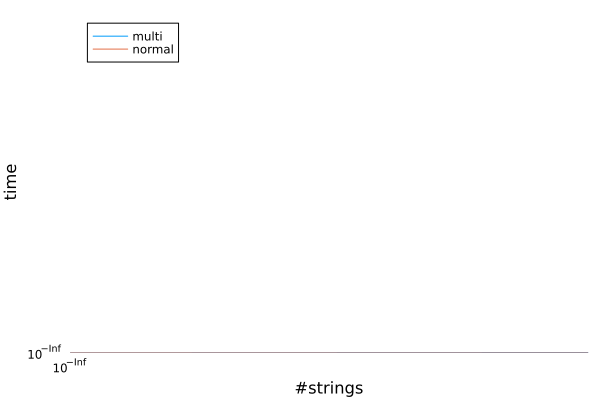

In [42]:
using Plots

plot(lengths_multi, times_multi, label="multi", xlabel="#strings", ylabel="time", legend=:topleft, xscale=:log10, yscale=:log10)
plot!(lengths_normal, times_normal, label="normal")

In [43]:
times_multi

12-element Vector{Float64}:
 0.178559958
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [44]:
times_normal

12-element Vector{Float64}:
 0.000322416
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0